In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_data = pd.read_csv('tblTest.csv')
train_data = pd.read_csv('tblTrain.csv')

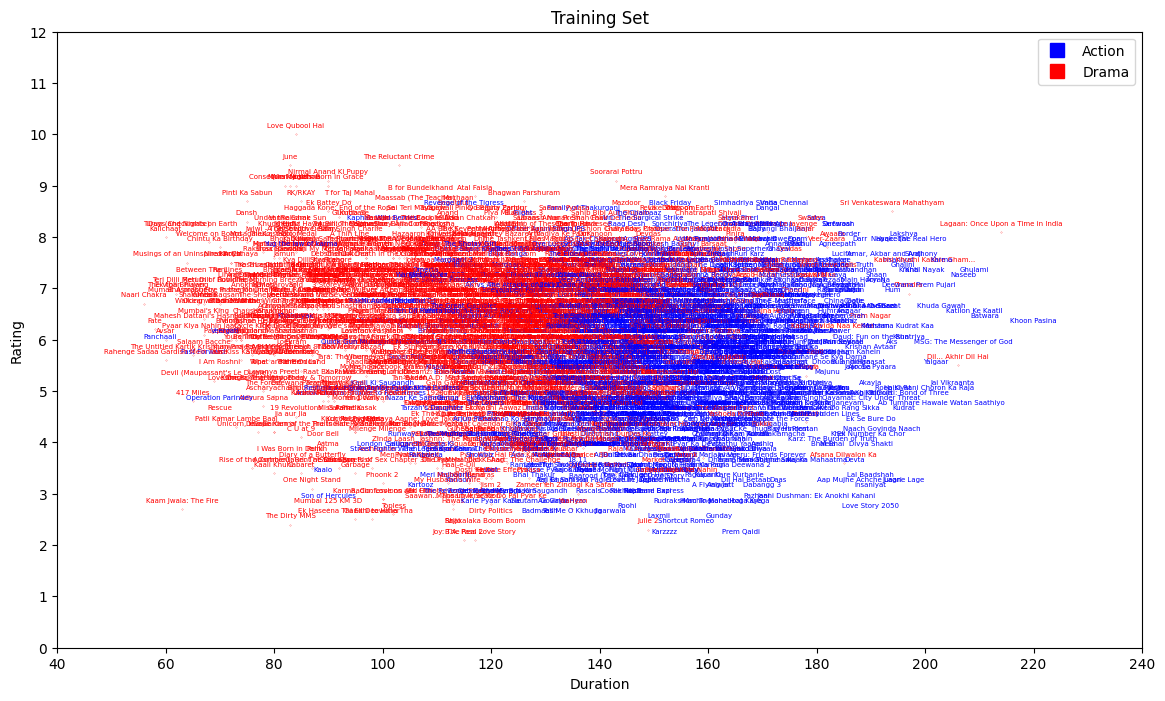

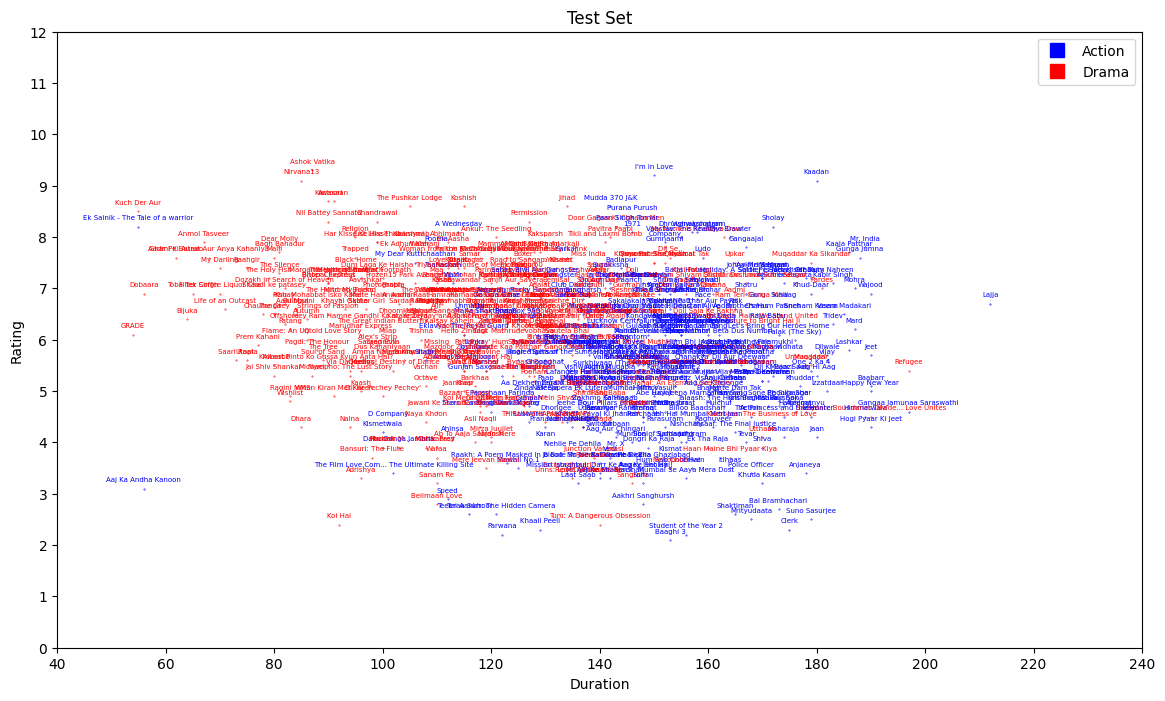

In [53]:

#for Train Set
plt.figure(figsize=(14, 8))
plt.scatter(train_data[train_data['Genre'] == 'Action']['Duration'], train_data[train_data['Genre'] == 'Action']['Rating'], label='Action', c='blue', marker='', s=0.1)
plt.scatter(train_data[train_data['Genre'] == 'Drama']['Duration'], train_data[train_data['Genre'] == 'Drama']['Rating'], label='Drama', c='red', marker='.', s=0.1)

for index, movie in train_data.iterrows():
    color = 'blue' if movie['Genre'] == 'Action' else 'red'
    plt.annotate(movie['Name'], (movie['Duration'], movie['Rating']), textcoords="offset points", xytext=(0, 5), ha='center', color=color, fontsize=5)
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.title('Training Set')

handles = [plt.Line2D([], [], marker='s', color='blue', markersize=10, linestyle='', label='Action'),
           plt.Line2D([], [], marker='s', color='red', markersize=10, linestyle='', label='Drama')]
plt.legend(handles=handles)
plt.xticks(np.arange(40, 260, 20))
plt.yticks(np.arange(0, 13, 1))
plt.show()

#For Test Set
plt.figure(figsize=(14, 8))
plt.scatter(test_data[test_data['Genre'] == 'Action']['Duration'], test_data[test_data['Genre'] == 'Action']['Rating'], label='Action', c='blue', marker='.', s=0.5)
plt.scatter(test_data[test_data['Genre'] == 'Drama']['Duration'], test_data[test_data['Genre'] == 'Drama']['Rating'], label='Drama', c='red', marker='.', s=0.5)

for index, movie in test_data.iterrows():
    color = 'blue' if movie['Genre'] == 'Action' else 'red'
    plt.annotate(movie['Name'], (movie['Duration'], movie['Rating']), textcoords="offset points", xytext=(0, 5), ha='center', color=color, fontsize=5)
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.title('Test Set')

handles = [plt.Line2D([], [], marker='s', color='blue', markersize=10, linestyle='', label='Action'),
           plt.Line2D([], [], marker='s', color='red', markersize=10, linestyle='', label='Drama')]
plt.legend(handles=handles)
plt.xticks(np.arange(40, 260, 20))
plt.yticks(np.arange(0, 13, 1))
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


knn_neighbors = [i for i in range(1, 500, 2)]
Accuracy = []

for k in knn_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data[['Duration', 'Rating']], train_data['Genre'])
    y_pred = knn.predict(test_data[['Duration', 'Rating']])
    cm = confusion_matrix(test_data['Genre'], y_pred, labels=['Action', 'Drama'])
    accuracy= (cm[0, 0] + cm[1, 1]) / np.sum(cm)
    Accuracy.append(accuracy)

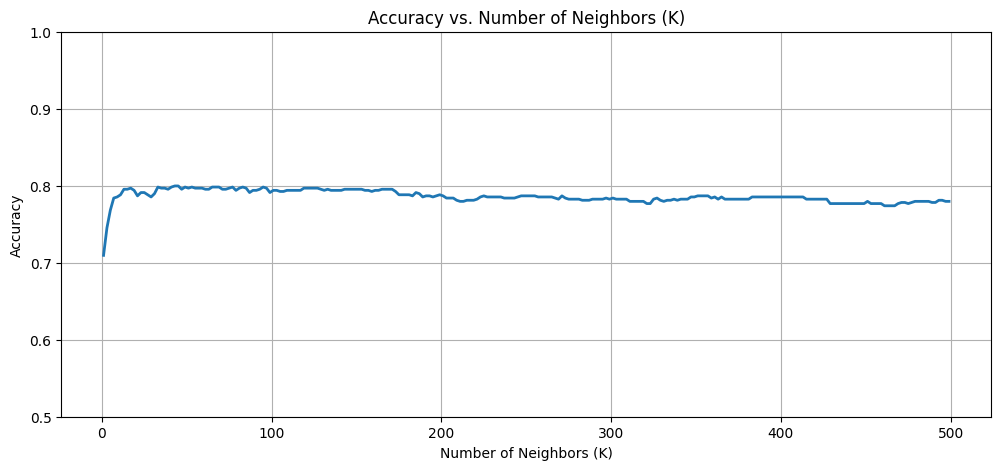

In [74]:
plt.figure(figsize=(12, 5))
plt.plot(knn_neighbors, Accuracy, linestyle='-', linewidth=2)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.yticks(np.arange(0.5, 1.01, 0.1))
plt.grid(True)
plt.show()

In [80]:
max_value = max(Accuracy)
max_index = Accuracy.index(max_value)
best_k = knn_neighbors[max_index]
print('Best K:', best_k, 'and Accuracy:', max_value)

Best K: 43 and Accuracy: 0.7997138769670958


Confusion Matrix:


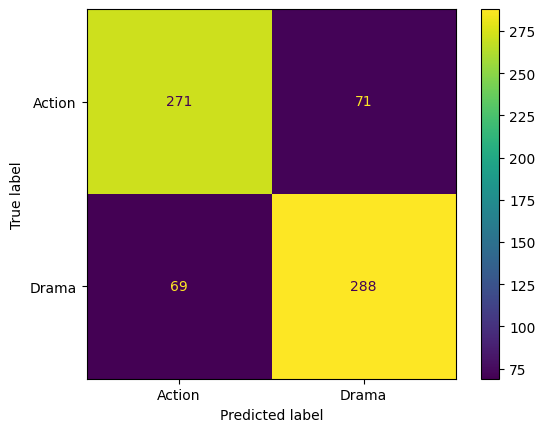

Scores for each Genre:
Precision: [0.79705882 0.80222841]
Recall: [0.79239766 0.80672269]
F1 Score: [0.79472141 0.80446927]


Overall Score for both Genres:
Precision: 0.7996990855830419
Recall: 0.7997138769670958
F1 Score: 0.799699931522005


In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score

knn = KNeighborsClassifier(best_k)
knn.fit(train_data[['Duration', 'Rating']], train_data['Genre'])
y_pred = knn.predict(test_data[['Duration', 'Rating']])
cm = confusion_matrix(test_data['Genre'], y_pred, labels=['Action', 'Drama'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Action', 'Drama'])
disp.plot()
print('Confusion Matrix:')
plt.show()

print('Scores for each Genre:')
print('Precision:', precision_score(test_data['Genre'], y_pred, average=None))
print('Recall:', recall_score(test_data['Genre'], y_pred, average=None))
print('F1 Score:', f1_score(test_data['Genre'], y_pred, average=None))


print('\n\nOverall Score for both Genres:')
print('Precision:', precision_score(test_data['Genre'], y_pred, average='weighted'))
print('Recall:', recall_score(test_data['Genre'], y_pred, average='weighted'))
print('F1 Score:', f1_score(test_data['Genre'], y_pred, average='weighted'))

